<a href="https://colab.research.google.com/github/0ShNa0/Machine-Failure-Prediction-via-Quantum-Computing/blob/main/Machine_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.8 MB/s eta 0:00:00


In [ ]:
import pennylane as qml

In [ ]:
df=pd.read_csv("/content/ machine failure.csv")

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df['Type'].describe()

,Type
count,10000
unique,3
top,L
freq,6000


In [ ]:
df['Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Type
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [ ]:

y=df["Machine failure"]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns=['Type']
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

X = pd.concat([df, one_hot_df], axis=1)

X = X.drop(labels=["Machine failure","Product ID","UDI","Type"], axis=1)

In [ ]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0.0,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0.0,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0.0,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0.0,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0.0,1.0,0.0


In [ ]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.value_counts("0")

,proportion
Machine failure,
0,0.9661
1,0.0339


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
y = torch.tensor(y, dtype=torch.float32)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
n_qubits = 2

In [ ]:

dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    """Quantum feature encoding + trainable variational layers"""
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)

    qml.CNOT(wires=[0, 1])


    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)

    return qml.expval(qml.PauliZ(0))

In [ ]:
inputs = np.array([0.5, 0.1])
weights = np.array([0.2, 0.3])

drawer = qml.draw(quantum_circuit)

print(drawer(inputs, weights))

0: ──RY(0.50)─╭●──RY(0.20)─┤  <Z>
1: ──RY(0.10)─╰X──RY(0.30)─┤     


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="rbf", probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc*100:.4f}")

Logistic Regression Accuracy: 99.9000
SVM Accuracy: 99.9000
Decision Tree Accuracy: 99.7500
Random Forest Accuracy: 99.9000
XGBoost Accuracy: 99.9000


In [ ]:
class HybridQNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.q_params = nn.Parameter(torch.randn(2))

    def forward(self, x):
        batch_results = [quantum_circuit(data_point, self.q_params) for data_point in x]
        return torch.stack(batch_results)

qnn = HybridQNN()


In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(qnn.parameters(), lr=0.01)


epochs = 150
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = qnn(X_train).squeeze()
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


with torch.no_grad():
    y_pred_test = qnn(X_test).squeeze()
    y_pred_test = torch.sigmoid(y_pred_test)
    accuracy = ((y_pred_test > 0.5) == y_test).float().mean().item()

print(f"Test Accuracy: {accuracy*100:.4f}")

Epoch 0: Loss = 0.7580
Epoch 5: Loss = 0.7403
Epoch 10: Loss = 0.7228
Epoch 15: Loss = 0.7056
Epoch 20: Loss = 0.6886
Epoch 25: Loss = 0.6720
Epoch 30: Loss = 0.6557
Epoch 35: Loss = 0.6400
Epoch 40: Loss = 0.6249
Epoch 45: Loss = 0.6103
Epoch 50: Loss = 0.5963
Epoch 55: Loss = 0.5830
Epoch 60: Loss = 0.5704
Epoch 65: Loss = 0.5584
Epoch 70: Loss = 0.5472
Epoch 75: Loss = 0.5366
Epoch 80: Loss = 0.5268
Epoch 85: Loss = 0.5176
Epoch 90: Loss = 0.5090
Epoch 95: Loss = 0.5011
Epoch 100: Loss = 0.4938
Epoch 105: Loss = 0.4871
Epoch 110: Loss = 0.4810
Epoch 115: Loss = 0.4753
Epoch 120: Loss = 0.4701
Epoch 125: Loss = 0.4654
Epoch 130: Loss = 0.4612
Epoch 135: Loss = 0.4573
Epoch 140: Loss = 0.4538
Epoch 145: Loss = 0.4506
Test Accuracy: 96.8000


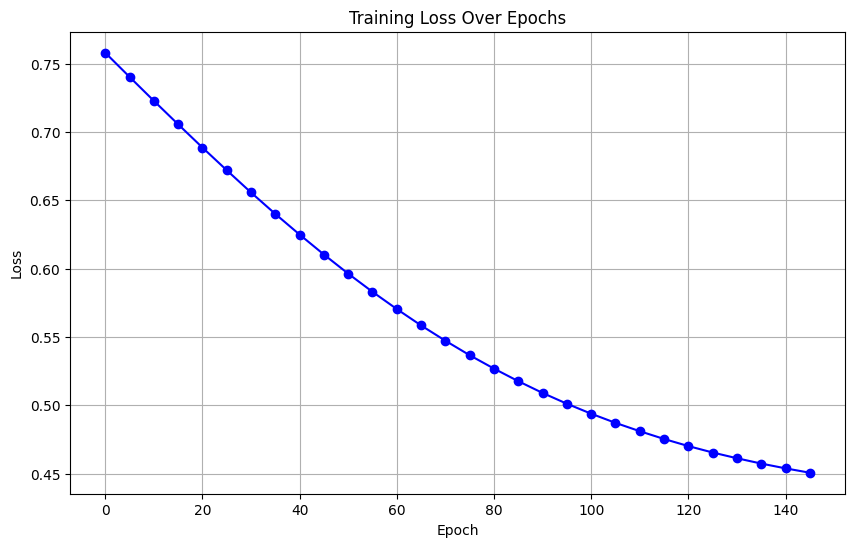

In [ ]:
import matplotlib.pyplot as plt


loss_values = {
    0: 0.7580,
    5: 0.7403,
    10: 0.7228,
    15: 0.7056,
    20: 0.6886,
    25: 0.6720,
    30: 0.6557,
    35: 0.6400,
    40: 0.6249,
    45: 0.6103,
    50: 0.5963,
    55: 0.5830,
    60: 0.5704,
    65: 0.5584,
    70: 0.5472,
    75: 0.5366,
    80: 0.5268,
    85: 0.5176,
    90: 0.5090,
    95: 0.5011,
    100: 0.4938,
    105: 0.4871,
    110: 0.4810,
    115: 0.4753,
    120: 0.4701,
    125: 0.4654,
    130: 0.4612,
    135: 0.4573,
    140: 0.4538,
    145: 0.4506
}

epochs = sorted(loss_values.keys())
losses = [loss_values[epoch] for epoch in epochs]


plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()